In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with actual credentials

connection = mysql.connector.connect(
user='root',
password='Root',
host='localhost',
database='ecommerce'
)
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
#printing rst 5 records from each table
print(customer_data.head())
print(product_data.head())
print(order_data.head())

  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     john            Sydney         john@gmail.com  9987234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3           24-2, Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  
  product_id product_name     category sub_category  original_price  \
0       P102        Chair    furniture       Chairs         20000.0   
1       P103       Laptop  Electronics     computer         60000.0   
2       P104   Smartphone  Electronics        phone         45000.0   
3

In [4]:
if 'category' in product_data.columns:
    product_data['category']=product_data['category'].replace('furniture','Furniture')
    print(product_data['category'].unique())

['Furniture' 'Electronics' 'Appliance']


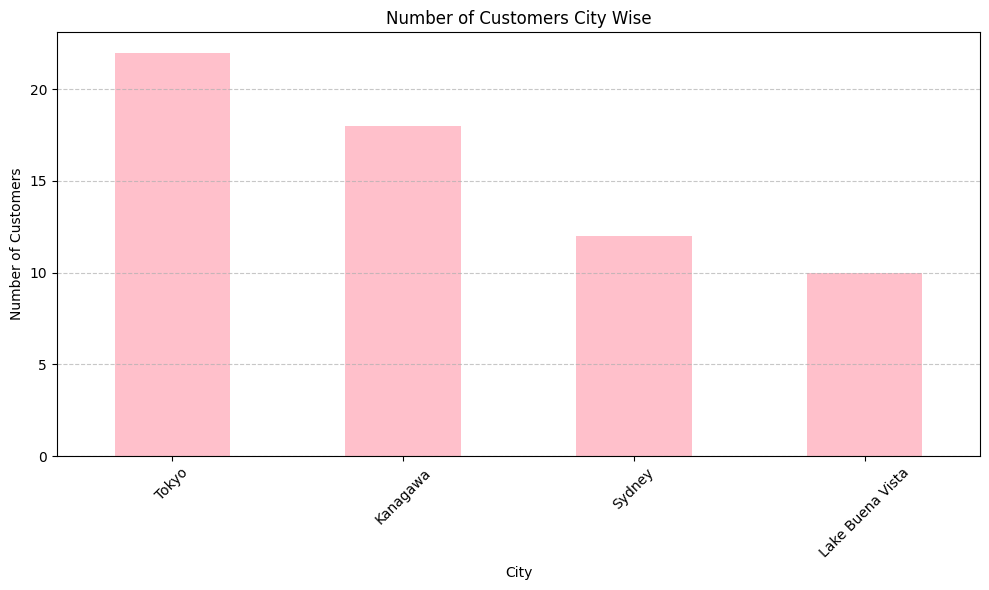

In [3]:
city_wise_count = customer_data['city'].value_counts()

# Plot bar graph
plt.figure(figsize=(10, 6))
city_wise_count.plot(kind='bar', color='pink')
plt.title("Number of Customers City Wise")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar graph
plt.tight_layout()
plt.show()

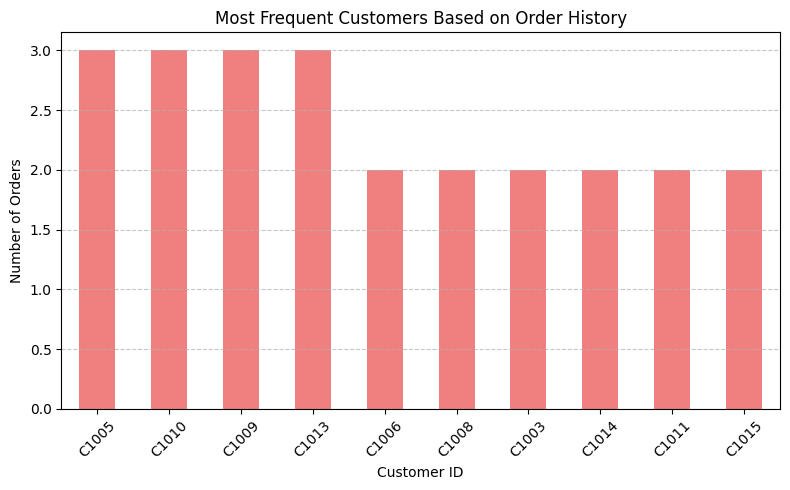

In [3]:
# Group data by 'customer_id' and count the number of orders
customer_order_count =order_data['customer_id'].value_counts().head(10)

# Print the most frequent customers
print("Most Frequent Customers:")
print(customer_order_count)

# Plot a bar graph of the most frequent customers
plt.figure(figsize=(8, 5))
customer_order_count.plot(kind='bar', color='lightcoral')
plt.title("Most Frequent Customers Based on Order History")
plt.xlabel("Customer ID")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the graph
plt.tight_layout()
plt.show()

Most Frequent Customers:


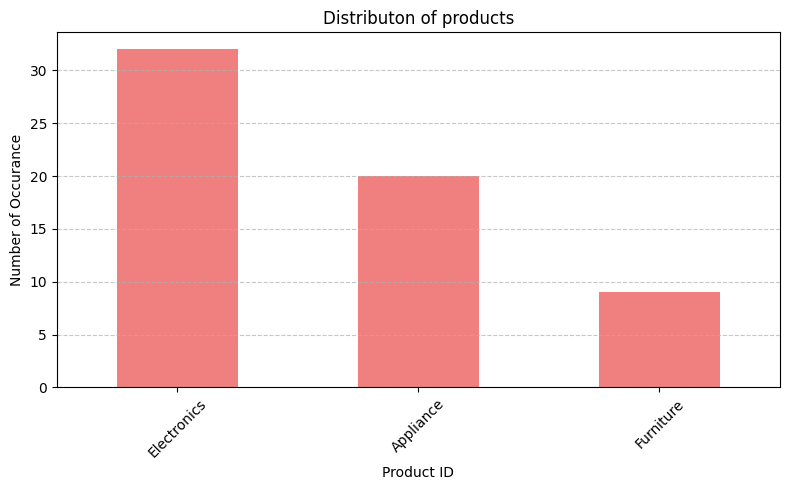

In [5]:
# Group data by 'customer_id' and count the number of orders
product_id_count =product_data['category'].value_counts()

# Print the most frequent customers
print("Most Frequent Customers:")

# Plot a bar graph of the most frequent customers
plt.figure(figsize=(8, 5))
product_id_count.plot(kind='bar', color='lightcoral')
plt.title("Distributon of products")
plt.xlabel("Product ID")
plt.ylabel("Number of Occurance")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the graph
plt.tight_layout()
plt.show()

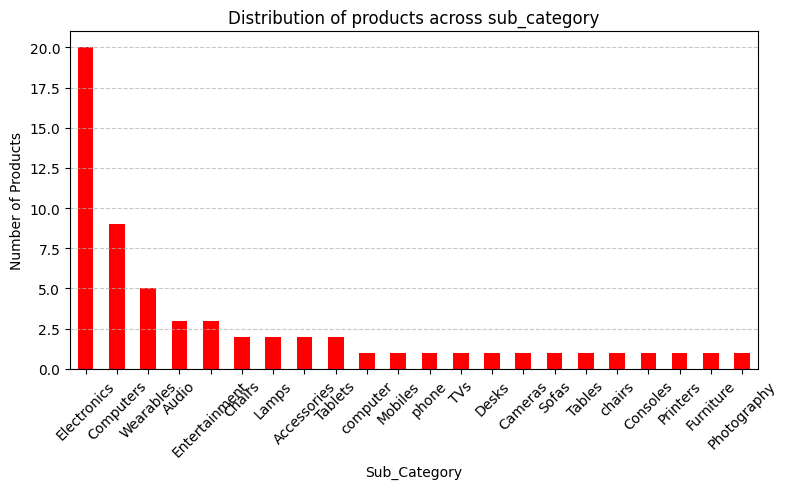

In [6]:
total_products_by_category=product_data['sub_category'].value_counts()

# Plot the distribution of products by category
plt.figure(figsize=(8, 5))
total_products_by_category.plot(kind='bar', color='red')
plt.title("Distribution of products across sub_category")
plt.xlabel("Sub_Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the graph
plt.tight_layout()
plt.show()

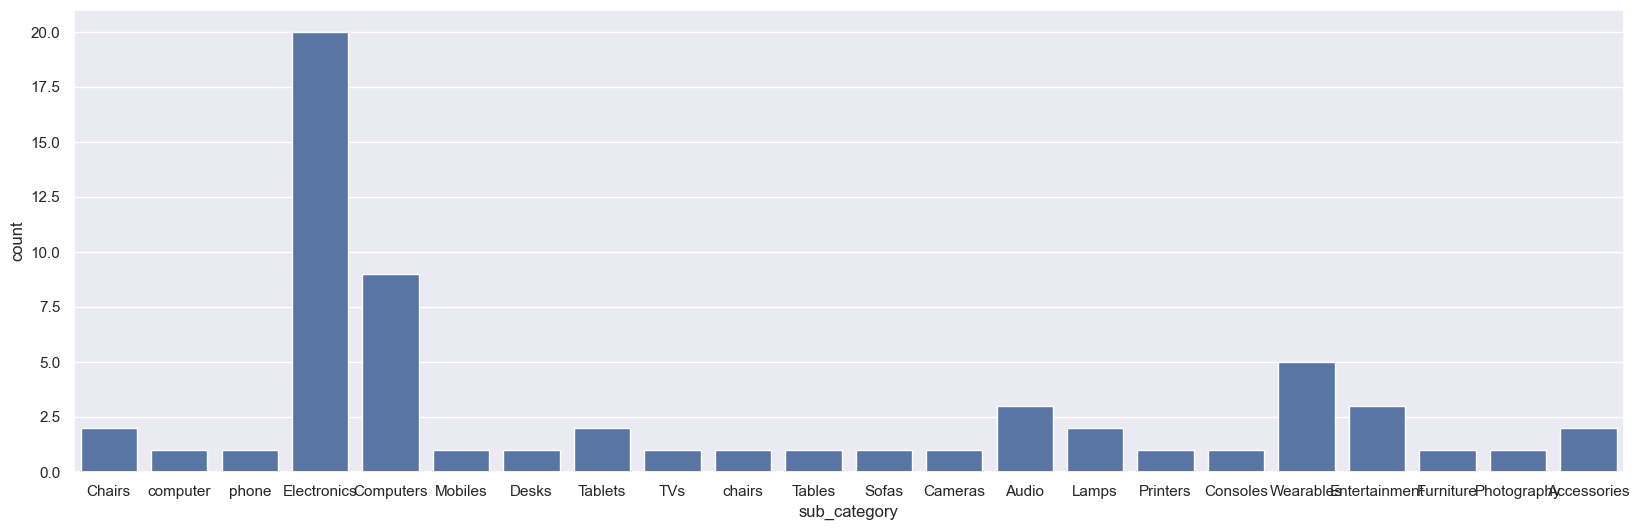

In [5]:
sns.set(rc={'figure.figsize':(20,6)})
ax=sns.countplot(data=product_data,x='sub_category')

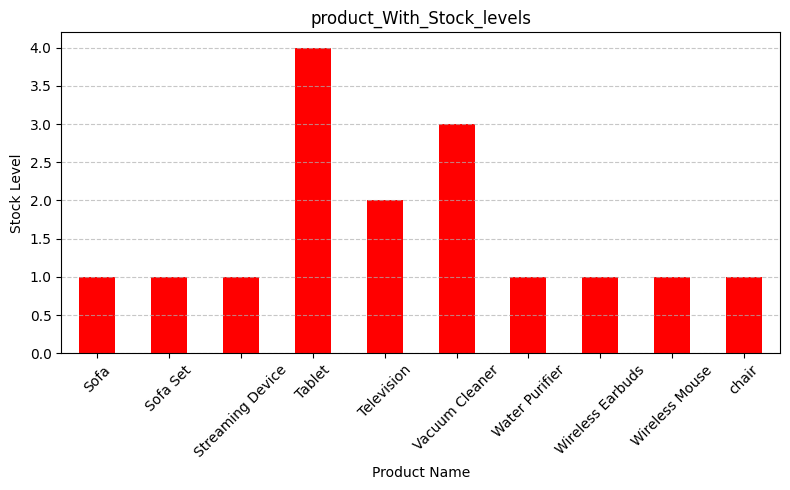

In [3]:
product_With_Stock_levels=product_data.groupby('product_name')['stock'].count().tail(10)

# Plot the distribution of products by category
plt.figure(figsize=(8, 5))
product_With_Stock_levels.plot(kind='bar', color='red')
plt.title("product_With_Stock_levels")
plt.xlabel("Product Name")
plt.ylabel("Stock Level")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the graph
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Average, Maximum, and Minimum Selling Prices')

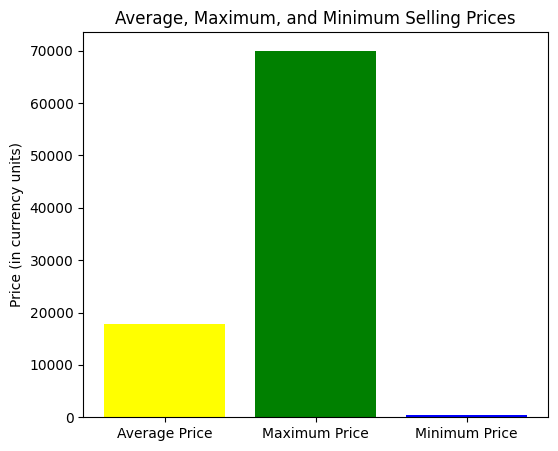

In [16]:
average_price = product_data['selling_price'].mean()
maximum_price = product_data['selling_price'].max()
minimum_price = product_data['selling_price'].min()

# Data for visualization
price_metrics = ['Average Price', 'Maximum Price', 'Minimum Price']
price_values = [average_price, maximum_price, minimum_price]

# Plotting the bar chart
plt.figure(figsize=(6, 5))
plt.bar(price_metrics, price_values, color=['yellow', 'green', 'blue'])

# Add labels and title
plt.ylabel('Price (in currency units)')
plt.title('Average, Maximum, and Minimum Selling Prices')

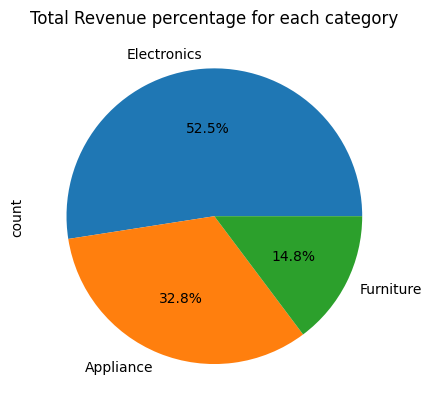

<Figure size 600x500 with 0 Axes>

In [7]:
Total_revenue=product_data['category'].value_counts().plot(kind='pie', autopct='%1.1f%%',title='Total Revenue percentage for each category')
plt.figure(figsize=(6, 5))

# Display the graph
plt.tight_layout()
plt.show()


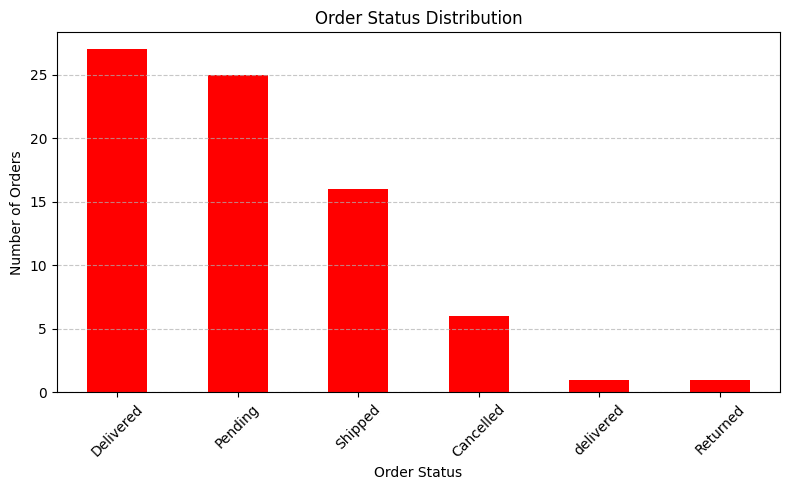

In [8]:
Order_Status1=order_data['order_status'].value_counts()

# Plot the distribution of products by category
plt.figure(figsize=(8, 5))
Order_Status1.plot(kind='bar', color='red')
plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the graph
plt.tight_layout()
plt.show()

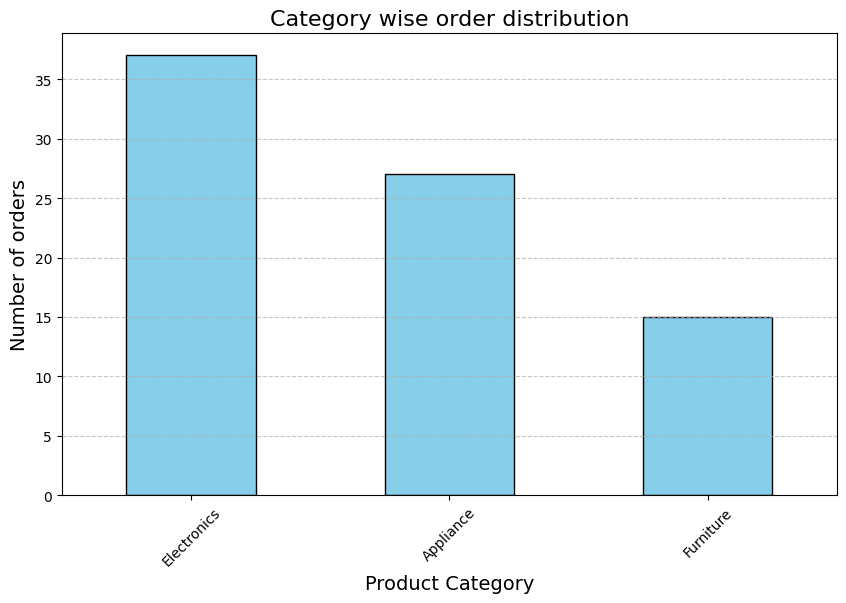

In [9]:
orders_merged=pd.merge(product_data,order_data,on='product_id',how='left')
category_counts=orders_merged['category'].value_counts()
plt.figure(figsize=(10,6))
category_counts.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title("Category wise order distribution",fontsize=16)
plt.xlabel("Product Category",fontsize=14)
plt.ylabel("Number of orders",fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

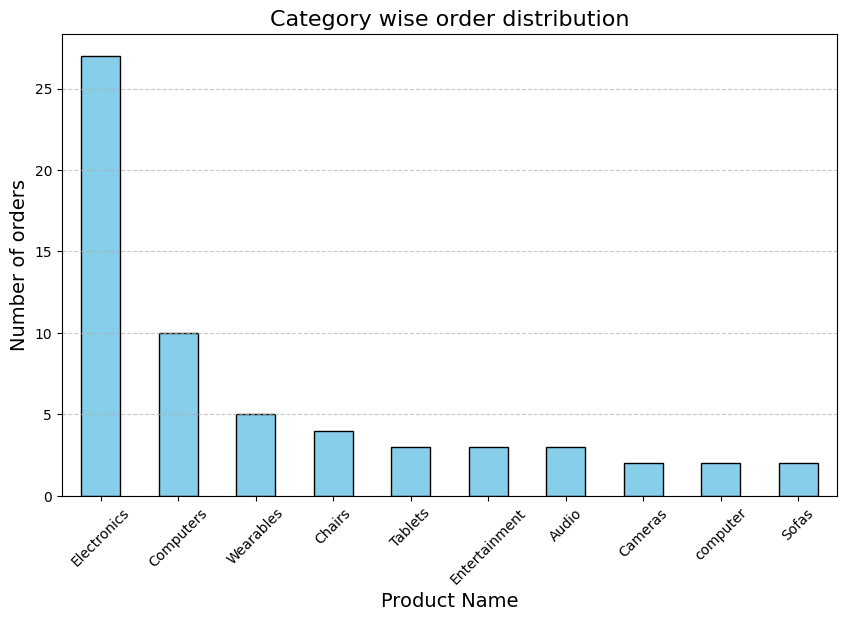

In [10]:
orders_merged=pd.merge(product_data,order_data,on='product_id',how='left')
category_counts=orders_merged['sub_category'].value_counts().head(10)
plt.figure(figsize=(10,6))
category_counts.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title("Category wise order distribution",fontsize=16)
plt.xlabel("Product Name",fontsize=14)
plt.ylabel("Number of orders",fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

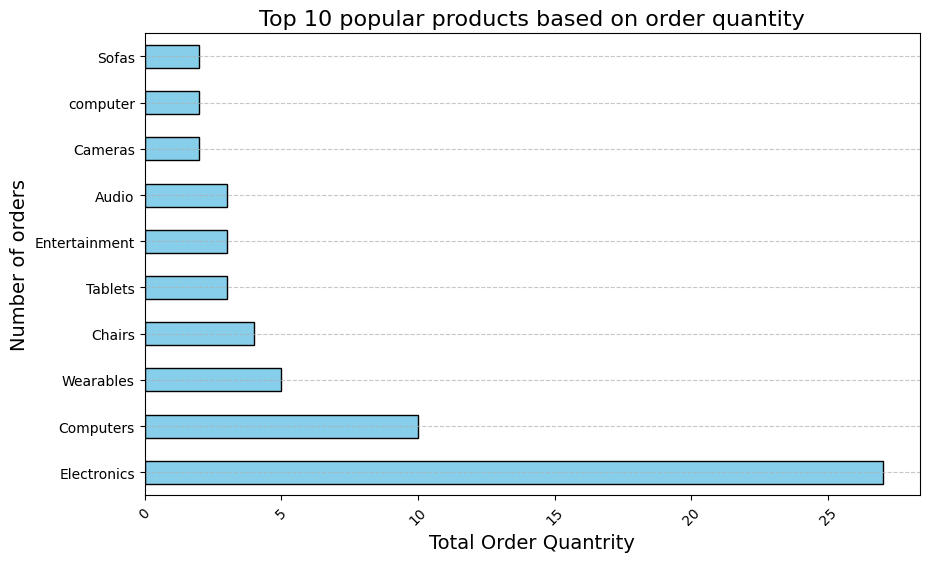

In [11]:
orders_merged=pd.merge(product_data,order_data,on='product_id',how='left')
category_counts=orders_merged['sub_category'].value_counts().head(10)
plt.figure(figsize=(10,6))
category_counts.plot(kind='barh',color='skyblue',edgecolor='black')
plt.title("Top 10 popular products based on order quantity",fontsize=16)
plt.xlabel("Total Order Quantrity",fontsize=14)
plt.ylabel("Number of orders",fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()